In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

%matplotlib inline

Mounted at /content/drive


## Loading Data

In [ ]:
path = '/content/drive/My Drive/ime672/'

df_train = pd.read_csv(path+'train.csv', index_col='User_ID')
df_train.Is_Response = pd.factorize(df_train.Is_Response)[0]
df_train_clean = pd.read_csv(path+'train_clean1.csv', index_col='User_ID')
df_train_clean.Is_Response = pd.factorize(df_train_clean.Is_Response)[0]

df_test = pd.read_csv(path+'test.csv', index_col='User_ID')
df_test_clean = pd.read_csv(path+'test_clean1.csv', index_col='User_ID')

In [ ]:
# Check for missing values
print('Missing values:')
print(df_train_clean.isnull().sum())

#Check for duplicate rows
if df_train_clean.shape==df_train_clean.drop_duplicates().shape:
    print('\nDuplicate rows present: NO')
else:
    print('\nDuplicate rows present: YES')

Missing values:
Description     0
Browser_Used    0
Device_Used     0
Is_Response     0
dtype: int64

Duplicate rows present: NO


# Browser vs Device

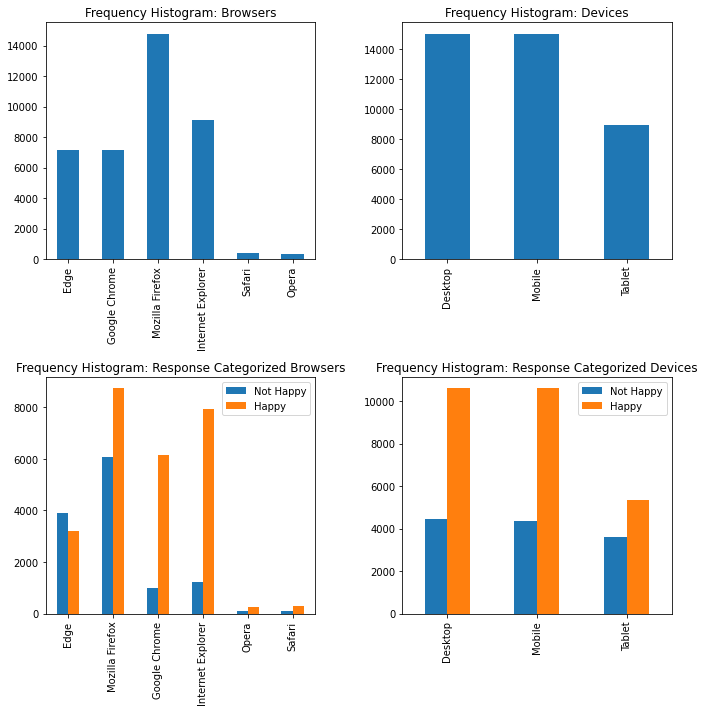

In [ ]:
# isolate the list of browsers and devices
browser_list = df_train_clean["Browser_Used"].value_counts()
device_list = df_train_clean["Device_Used"].value_counts()

# Removing redundancies in browser names
browser_list.loc['Internet Explorer'] += browser_list.loc['InternetExplorer'] + browser_list.loc['IE']
browser_list.drop(['InternetExplorer','IE'], inplace=True)
browser_list.loc['Google Chrome'] += browser_list.loc['Chrome']
browser_list.drop(['Chrome'], inplace=True)
browser_list.loc['Mozilla Firefox'] += browser_list.loc['Mozilla'] + browser_list.loc['Firefox']
browser_list.drop(['Mozilla','Firefox'], inplace=True)


#Grouping browsers and devices by responses
grouped = df_train_clean.groupby('Is_Response')

browser_0 = (grouped.get_group(0))["Browser_Used"]
browser_1 = (grouped.get_group(1))["Browser_Used"]

device_0 = (grouped.get_group(0))["Device_Used"]
device_1 = (grouped.get_group(1))["Device_Used"]

#Stacking positive and negative response frequencies for all browsers and devices
browser_byresponse = pd.concat([browser_0.value_counts(),browser_1.value_counts()],axis=1)
browser_byresponse.columns = ["Not Happy","Happy"]

device_byresponse = pd.concat([device_0.value_counts(),device_1.value_counts()],axis=1)
device_byresponse.columns = ["Not Happy","Happy"]

#Removing redundancies in browser names
browser_byresponse.loc['Internet Explorer'] += browser_byresponse.loc['InternetExplorer'] + browser_byresponse.loc['IE']
browser_byresponse.drop(['InternetExplorer','IE'], inplace=True)
browser_byresponse.loc['Google Chrome'] += browser_byresponse.loc['Chrome']
browser_byresponse.drop(['Chrome'], inplace=True)
browser_byresponse.loc['Mozilla Firefox'] += browser_byresponse.loc['Mozilla'] + browser_byresponse.loc['Firefox']
browser_byresponse.drop(['Mozilla','Firefox'], inplace=True)


# plotting frequency bar plots for browsers and devices
fig, ax = plt.subplots(2,2)

ax[0,0].set_title("Frequency Histogram: Browsers")
browser_list.plot(kind='bar',ax=ax[0,0],figsize=(10,10))

ax[0,1].set_title("Frequency Histogram: Devices")
device_list.plot(kind='bar',ax=ax[0,1],figsize=(10,10))

ax[1,0].set_title("Frequency Histogram: Response Categorized Browsers")
browser_byresponse.plot(kind='bar',ax=ax[1,0],figsize=(10,10))

ax[1,1].set_title("Frequency Histogram: Response Categorized Devices")
device_byresponse.plot(kind='bar',ax=ax[1,1],figsize=(10,10))

fig.tight_layout()
fig.show()

In [ ]:
from scipy.stats import chi2_contingency
contingent_table_1 = pd.crosstab(df_train_clean["Browser_Used"],df_train_clean["Is_Response"])
chi2, p, dof, expected = chi2_contingency(contingent_table_1.values)
print("chi2 statistic %f p_value %f for Browser Used and Happiness" %(chi2,p))
contingent_table_2 = pd.crosstab(df_train_clean["Device_Used"],df_train_clean["Is_Response"])
chi2, p, dof, expected = chi2_contingency(contingent_table_2.values)
print("chi2 statistic %0.3f p_value %0.3f for Device used and Happiness" %(chi2,p))

chi2 statistic 5536.879465 p_value 0.000000 for Browser Used and Happiness
chi2 statistic 385.997 p_value 0.000 for Device used and Happiness


#Word Count

In [ ]:
import itertools
# #split the words based on "|"
#sentence_series = df_train_clean["Description"].map(lambda x: x.split("|"))

# #group the rows by 0 and 1 reponse
grouped = df_train_clean.groupby('Is_Response')

# #split the words in each row using "|"
temporary_0 = (grouped.get_group(0))["Description"].map(lambda x: x.split("|"))
temporary_1 = (grouped.get_group(1))["Description"].map(lambda x: x.split("|"))

# #combine each row's words into one list
words_0 = list(itertools.chain.from_iterable(temporary_0.tolist()))
words_1 = list(itertools.chain.from_iterable(temporary_1.tolist()))

# #convert them to lower case
words_0 =  [x.lower() for x in words_0]
words_1 =  [x.lower() for x in words_1]

# word counts in happy and non-happy reviews
count_0 = [len(descr) for descr in temporary_0.tolist()]
count_1 = [len(descr) for descr in temporary_1.tolist()]

# #statistics
print("Number of words:", + len(words_0 + words_1))
print("Number of unique words:", + len(set(words_0 + words_1)))
print("Number of Happy Words used: ", + len(words_0))
print("Number of Non_Happy Words used: ", + len(words_1))
print("Number of Unique Happy Words used: ", + len(set(words_0)))
print("Number of Unique Non_Happy Words used: ", + len(set(words_1)))
print("Average No. of words in Happy Descriptions: ", + sum(count_0)/len(count_0))
print("Average No. of words in Non_Happy Descriptions: ", + sum(count_1)/len(count_1))

Number of words: 2595870
Number of unique words: 52409
Number of Happy Words used:  970469
Number of Non_Happy Words used:  1625401
Number of Unique Happy Words used:  28196
Number of Unique Non_Happy Words used:  38444
Average No. of words in Happy Descriptions:  78.19426315365402
Average No. of words in Non_Happy Descriptions:  61.28731948267411


In [ ]:
from textblob import TextBlob
TextBlob(df_train_clean['Description'][0]).sentiment.polarity

0.0

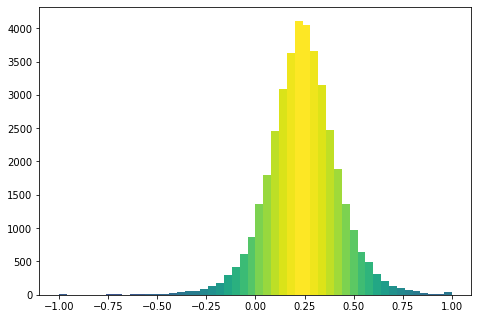

52.08209729194641


In [ ]:
import time
from matplotlib import colors
from textblob import TextBlob

start=time.time()

#Polarity rating displays the descriptions of the users on a scale of [-1,1]. -1 indicates the hatred and 1 indicates the maximum likeness
df_train['polarity'] = df_train['Description'].map(lambda text: TextBlob(text).sentiment.polarity)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
N, bins, patches = ax.hist(df_train['polarity'], bins = 50)

#for different colors on the histogram
fracs = ((N**(1 / 5)) / N.max())
norm = colors.Normalize(fracs.min(), fracs.max())
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)

ax.set_xlabel='polarity'
ax.set_ylabel='count'
ax.set_title='Sentiment Polarity Distribution'
plt.show()

end=time.time()
print(end-start)

In [ ]:
import time
start = time.time()

#splitted the words
sentence_series = df_train_clean["Description"].map(lambda x: x.split("|"))

def freq(str):
    str2=list(set(str))

    word_count=[]
    for i in range(0, len(str2)):
        word_count.append(str.count(str2[i]))

    fig=plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.barh(str2,word_count)
    ax.set_xlabel("Word Count")
    plt.show()

#computed and visualised the term frequency vector on bar chart
for key in sentence_series:
  freq(key)

end=time.time()
print(end-start)

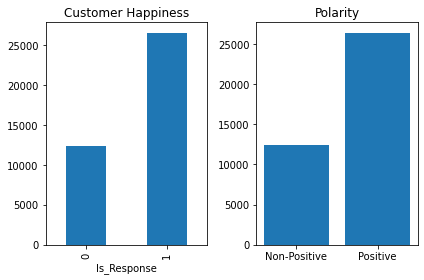

In [ ]:
#Comparison of the number of happy and unhappy customers and the positive and non-positive polarity of their descriptions

Polarity=[]
Neg_Polarity=(int)((df_train.loc[df_train.polarity <= 0.17, ['Description']]).count())
Pos_Polarity=(int)((df_train.loc[df_train.polarity > 0.17, ['Description']]).count())

Polarity.append(Neg_Polarity)
Polarity.append(Pos_Polarity)

fig, ax = plt.subplots(1,2)
#response_list=df_train['Is_Response']
x = df_train.groupby('Is_Response').count()['polarity']

x.plot(kind='bar',ax=ax[0])
#response_list.value_counts().plot(kind='bar', ax=ax[0])
ax[0].set_title("Customer Happiness")
ax[1].bar(["Non-Positive","Positive"],Polarity)
ax[1].set_title("Polarity")
fig.tight_layout()
fig.show()


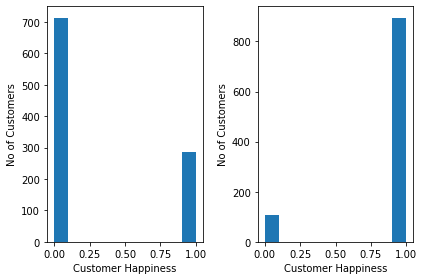

In [ ]:
fig, ax = plt.subplots(1,2)
x = (df_train.loc[df_train.polarity < 0.17, ['Is_Response']].sample(1000).values)

ax[0].hist(x)
ax[0].set_xlabel('Customer Happiness')
ax[0].set_ylabel('No of Customers')
y = (df_train.loc[df_train.polarity >= 0.17, ['Is_Response']].sample(1000).values)
ax[1].hist(y)
ax[1].set_xlabel('Customer Happiness')
ax[1].set_ylabel('No of Customers')
fig.tight_layout()
fig.show()

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip -q glove.6B.zip

In [ ]:
#Takes 10 minutes to compile
#Out of 52409 words, only 16000 words were present in the corpus. More will be incorporated
import numpy as np
from scipy import spatial
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from mpl_toolkits import mplot3d

embeddings_dict = {}
with open("glove.6B.50d.txt", 'r') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], "float32")
        embeddings_dict[word] = vector

tsne = TSNE(n_components=3, random_state=0)
words0 =  list(set(words_0))
vectors0 = [embeddings_dict[word] for word in words0 if word in embeddings_dict]
Y0 = tsne.fit_transform(vectors0)

words1 =  list(set(words_1))
vectors1 = [embeddings_dict[word] for word in words1 if word in embeddings_dict]
Y1 = tsne.fit_transform(vectors1)




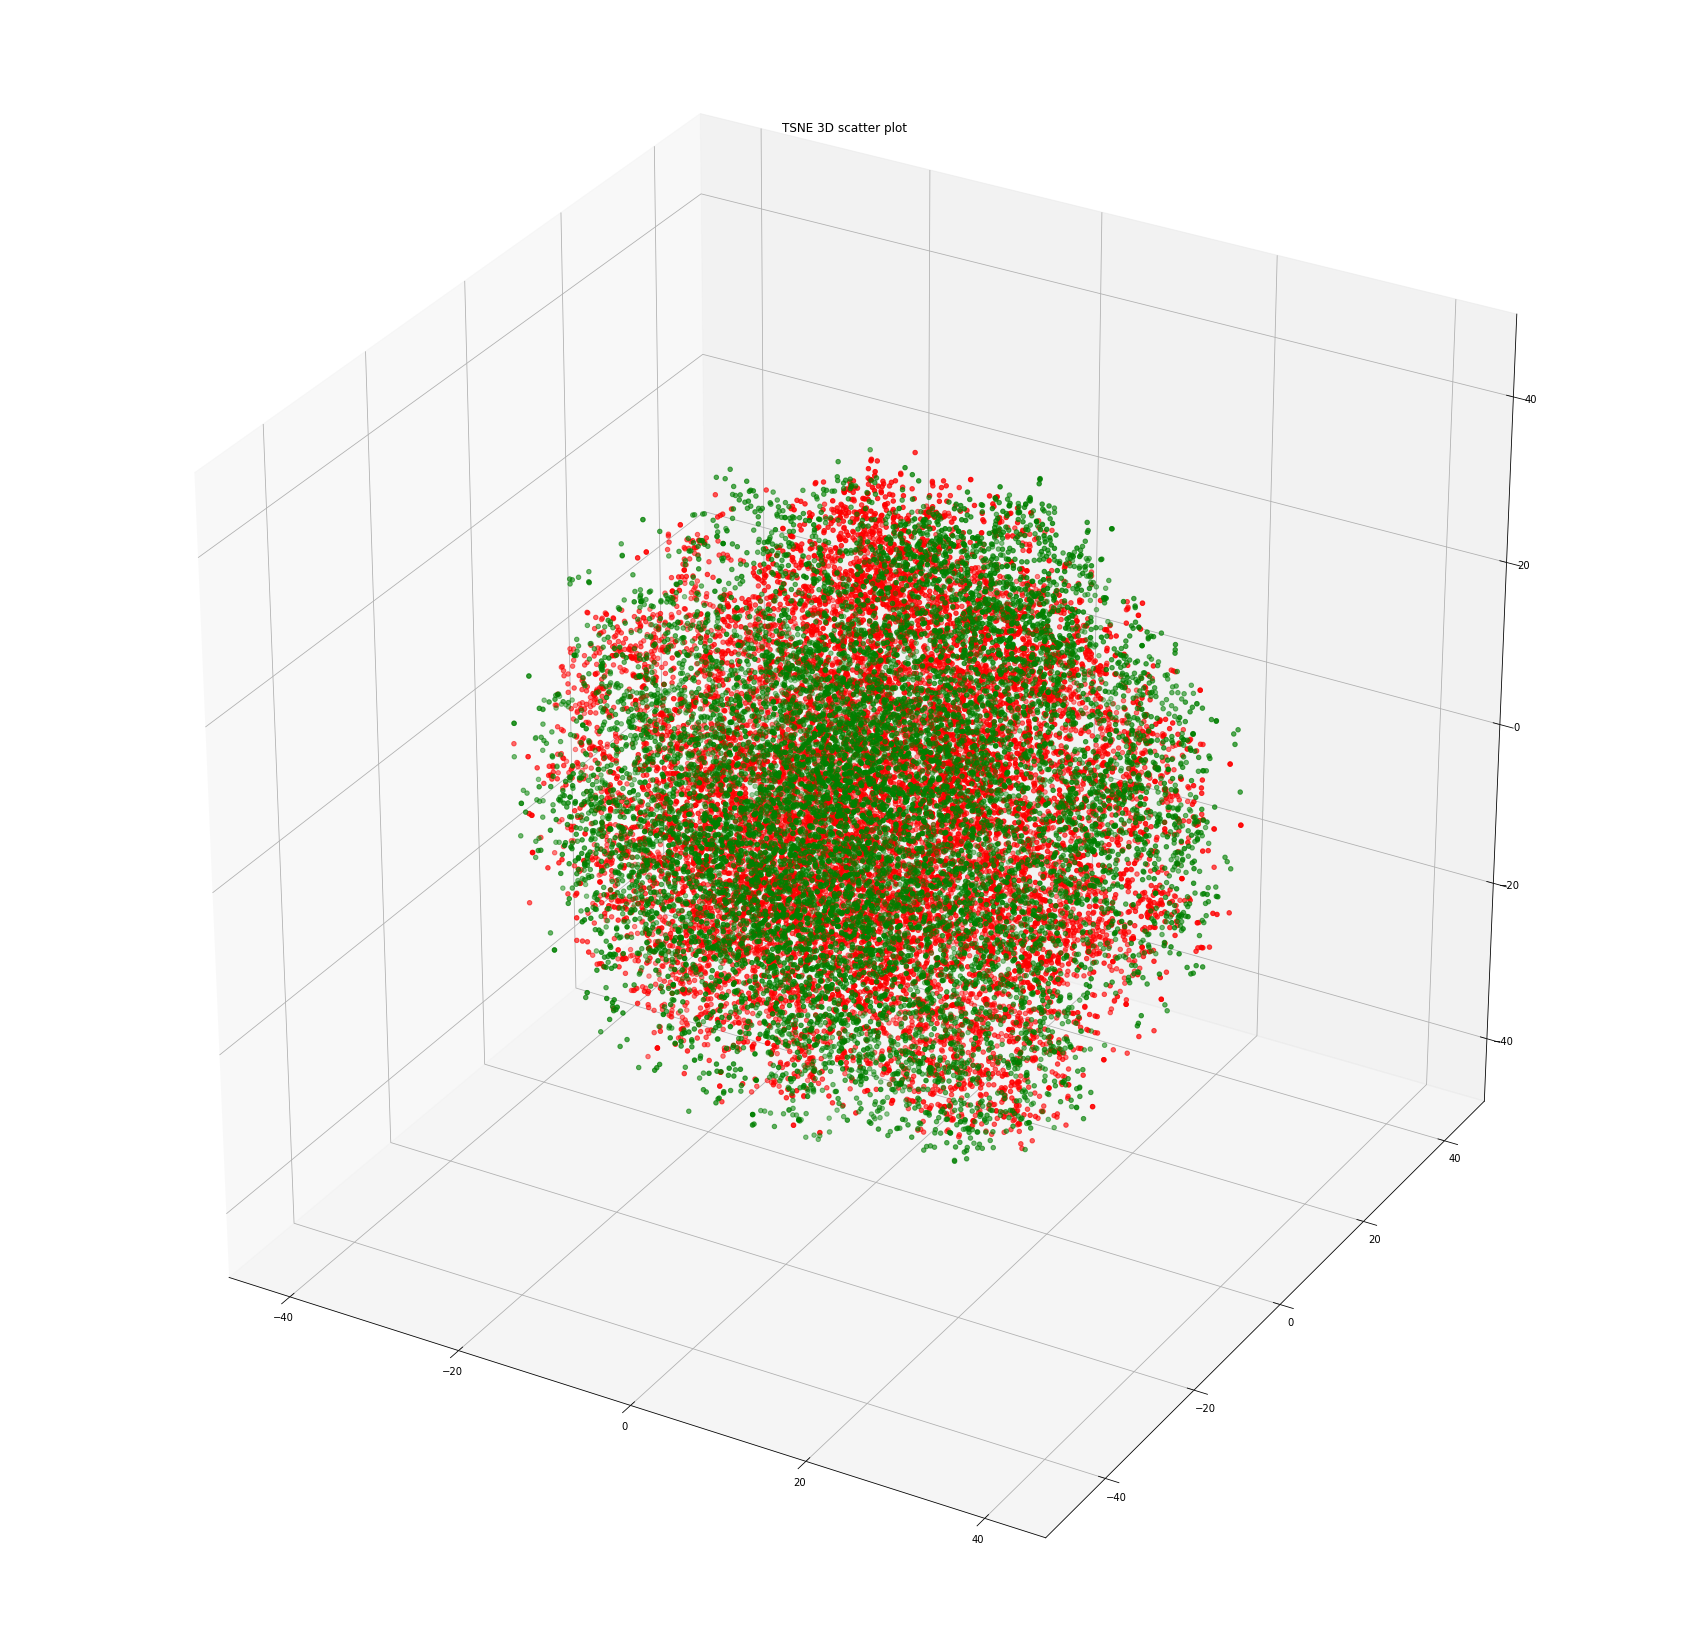

In [ ]:
fig = plt.figure(figsize = (30, 30))
ax = plt.axes(projection ="3d")

# Creating plot
ax.scatter3D(Y1[:,0], Y1[:,1], Y1[:,2], color = "red")
ax.scatter3D(Y0[:,0], Y0[:,1], Y0[:,2], color = "green")

plt.title("TSNE 3D scatter plot")

# show plot
plt.show()


# Text Processing

In [ ]:
!wget https://www.dropbox.com/s/ed9iuqw1zygspt5/listfile.txt?dl=1
pip install pyspellchecker

In [ ]:
from spellchecker import SpellChecker

#Python module for identifying as well as correcting the misspelled words
spell = SpellChecker()

#Total number of unique words
total_words = list(set(words_0+words_1))

#Total number of misspelled words in total_words
misspelled = list(spell.unknown(total_words))

#Total number of correctly spelled words in total_words
correctly_spelled = [x for x in total_words if x not in misspelled]

#all the misspelled words were passed through spell_checker, then the results were stored in a txt file (appox. time taken = 8 hrs)
#out of 40,925 unique misspelled words, it corrected 26429 words leaving 14496 words still incorrect
corrected_words = []
with open('listfile.txt?dl=1', 'r') as filehandle:
    for line in filehandle:
        currentPlace = line[:-1]
        corrected_words.append(currentPlace)

#correcting words_0 and storing them in words_0_corrected
words_0_corrected = []
for i in range(len(words_0)):
  if(words_0[i] in correctly_spelled):
    words_0_corrected = words_0_corrected + [words_0[i]]
  else:
    indexx = misspelled.index(words_0[i])
    words_0_corrected = words_0_corrected + [corrected_words[indexx]]

#correcting words_1 and storing them in words_1_corrected
words_1_corrected = []
for i in range(len(words_1)):
  if(words_1[i] in correctly_spelled):
    words_1_corrected = words_1_corrected + [words_1[i]]
  else:
    indexx = misspelled.index(words_1[i])
    words_1_corrected = words_1_corrected + [corrected_words[indexx]]

In [ ]:
import nltk
nltk.download('vader_lexicon')
!pip install twython

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
df_train['Vader'] = df_train['Description'].map(lambda text: SentimentIntensityAnalyzer().polarity_scores(text)['compound'])

#**Classification**

Importing Libraries

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn import model_selection
from sklearn.utils import class_weight
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier

**Data Transformation and Splitting**

In [ ]:
browsers = df_train_clean['Browser_Used']
browsers = browsers.replace('InternetExplorer','Internet_Explorer')
browsers = browsers.replace('IE','Internet_Explorer')
browsers = browsers.replace('Chrome','Google_Chrome')
browsers = browsers.replace('Mozilla','Mozilla_Firefox')
browsers = browsers.replace('Firefox','Mozilla_Firefox')
browsers = browsers.replace('Internet Explorer','Internet_Explorer')
browsers = browsers.replace('Google Chrome','Google_Chrome')
browsers = browsers.replace('Mozilla Firefox','Mozilla_Firefox')

df_train_clean['Word_Count'] = df_train_clean['Description'].map(lambda text: len(text.split("|")));

cvec = CountVectorizer()
X = browsers
Y = df_train_clean.Is_Response

cvec = CountVectorizer(stop_words='english').fit(X)
browser = pd.DataFrame(cvec.transform(X).todense(),columns=cvec.get_feature_names())
browser = browser.set_index(pd.Index(X.index))

X = df_train_clean.Device_Used
Y = df_train_clean.Is_Response

cvec = CountVectorizer(stop_words='english').fit(X)
device = pd.DataFrame(cvec.transform(X).todense(), columns=cvec.get_feature_names())
device = device.set_index(pd.Index(X.index))

X = df_train['polarity']
polarity = pd.DataFrame(X)

X = df_train['Vader']
vader_polarity = pd.DataFrame(X)

X = df_train_clean['Word_Count']
word_count = pd.DataFrame(X)

train = pd.concat([browser, device, polarity, vader_polarity], axis=1)

X_representative, X_real_test, Y_representative, Y_real_test = train_test_split(train, Y, test_size=0.2, shuffle=True)
X_train, X_test, Y_train, Y_test = train_test_split(X_representative, Y_representative, test_size=0.2, shuffle=True)

In [ ]:
pd.set_option('display.max_columns', None)
print(train.head(10))

         edge  google_chrome  internet_explorer  mozilla_firefox  opera  \
User_ID                                                                   
id10326     1              0                  0                0      0   
id10327     0              0                  1                0      0   
id10328     0              0                  0                1      0   
id10329     0              0                  1                0      0   
id10330     1              0                  0                0      0   
id10331     0              0                  1                0      0   
id10332     0              0                  0                1      0   
id10333     0              1                  0                0      0   
id10334     0              0                  1                0      0   
id10335     0              1                  0                0      0   

         safari  desktop  mobile  tablet  polarity   Vader  
User_ID                               

#**Logistic Regression**

              precision    recall  f1-score   support

           0       0.80      0.64      0.71      1974
           1       0.85      0.93      0.88      4255

    accuracy                           0.83      6229
   macro avg       0.82      0.78      0.80      6229
weighted avg       0.83      0.83      0.83      6229

Time Taken: 0.19652652740478516
ROC Score: 0.7811022136184025


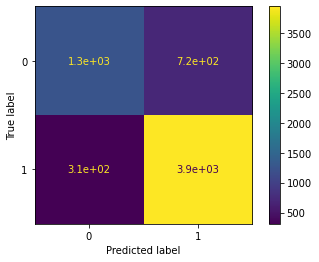

In [ ]:
start = time.time()
clf_LR = LogisticRegression().fit(X_train, Y_train)
Y_pred_LR = clf_LR.predict(X_test)
end = time.time()
metrics.plot_confusion_matrix(clf_LR, X_test, Y_test)
print(classification_report(Y_test, Y_pred_LR))
print("Time Taken: "+str(end-start))
fpr_LR, tpr_LR, thresh_LR = metrics.roc_curve(Y_test, Y_pred_LR)
auc_LR = metrics.roc_auc_score(Y_test, Y_pred_LR)
print("ROC Score: "+str(auc_LR))

#**Logistic Regression CV**

              precision    recall  f1-score   support

           0       0.80      0.64      0.71      1974
           1       0.85      0.93      0.88      4255

    accuracy                           0.83      6229
   macro avg       0.82      0.78      0.80      6229
weighted avg       0.83      0.83      0.83      6229

Time Taken: 2.583468437194824
ROC Score: 0.7814103319653736


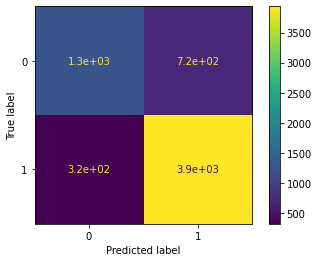

In [ ]:
start = time.time()
clf_LRCV = LogisticRegressionCV(cv=5, penalty='elasticnet', solver='saga', random_state=0, l1_ratios=[0.75], max_iter=5000).fit(X_train, Y_train)
Y_pred_LRCV = clf_LRCV.predict(X_test)
end = time.time()
metrics.plot_confusion_matrix(clf_LRCV, X_test, Y_test)
print(classification_report(Y_test, Y_pred_LRCV))
print("Time Taken: "+str(end-start))
fpr_LRCV, tpr_LRCV, thresh_LRCV = metrics.roc_curve(Y_test, Y_pred_LRCV)
auc_LRCV = metrics.roc_auc_score(Y_test, Y_pred_LRCV)
print("ROC Score: "+str(auc_LRCV))

#**Support Vector Machine**

              precision    recall  f1-score   support

           0       0.80      0.62      0.70      1974
           1       0.84      0.93      0.88      4255

    accuracy                           0.83      6229
   macro avg       0.82      0.77      0.79      6229
weighted avg       0.83      0.83      0.82      6229

Time Taken: 19.360989332199097
ROC Score: 0.7728506423696063


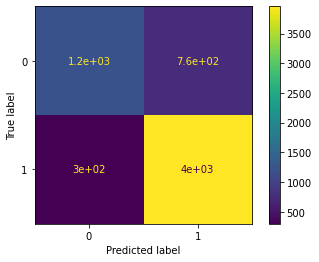

In [ ]:
start = time.time()
clf_SVM = SVC(kernel='rbf', gamma=0.7, C=1).fit(X_train, Y_train)
Y_pred_SVM = clf_SVM.predict(X_test)
end = time.time()
metrics.plot_confusion_matrix(clf_SVM, X_test, Y_test)
print(classification_report(Y_test, Y_pred_SVM))
print("Time Taken: "+str(end-start))
fpr_SVM, tpr_SVM, thresh_SVM = metrics.roc_curve(Y_test, Y_pred_SVM)
auc_SVM = metrics.roc_auc_score(Y_test, Y_pred_SVM)
print("ROC Score: "+str(auc_SVM))

#**AdaBoost Classifier**

              precision    recall  f1-score   support

           0       0.78      0.66      0.71      1974
           1       0.85      0.91      0.88      4255

    accuracy                           0.83      6229
   macro avg       0.81      0.79      0.80      6229
weighted avg       0.83      0.83      0.83      6229

Time Taken: 0.9237029552459717
ROC Score: 0.7852958019470508


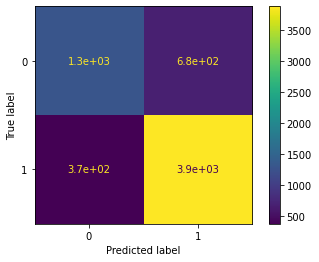

In [ ]:
start = time.time()
clf_ABC = AdaBoostClassifier().fit(X_train, Y_train)
Y_pred_ABC = clf_ABC.predict(X_test)
end = time.time()
metrics.plot_confusion_matrix(clf_ABC, X_test, Y_test)
print(classification_report(Y_test, Y_pred_ABC))
print("Time Taken: "+str(end-start))
fpr_ABC, tpr_ABC, thresh_ABC = metrics.roc_curve(Y_test, Y_pred_ABC)
auc_ABC = metrics.roc_auc_score(Y_test, Y_pred_ABC)
print("ROC Score: "+str(auc_ABC))

#**XGBoost Classifier**

              precision    recall  f1-score   support

           0       0.78      0.67      0.72      1974
           1       0.86      0.91      0.88      4255

    accuracy                           0.84      6229
   macro avg       0.82      0.79      0.80      6229
weighted avg       0.83      0.84      0.83      6229

Time Taken: 1.4653089046478271
ROC Score: 0.7910667109557027


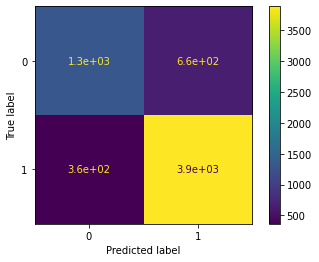

In [ ]:
start = time.time()
clf_XGB = XGBClassifier().fit(X_train, Y_train)
Y_pred_XGB = clf_XGB.predict(X_test)
end = time.time()
metrics.plot_confusion_matrix(clf_XGB, X_test, Y_test)
print(classification_report(Y_test, Y_pred_XGB))
print("Time Taken: "+str(end-start))
fpr_XGB, tpr_XGB, thresh_XGB = metrics.roc_curve(Y_test, Y_pred_XGB)
auc_XGB = metrics.roc_auc_score(Y_test, Y_pred_XGB)
print("ROC Score: "+str(auc_XGB))

#**Multi-Layered Perceptron Classifier**

              precision    recall  f1-score   support

           0       0.77      0.69      0.73      1974
           1       0.86      0.90      0.88      4255

    accuracy                           0.84      6229
   macro avg       0.82      0.80      0.81      6229
weighted avg       0.83      0.84      0.83      6229

Time Taken: 10.729132413864136
ROC Score: 0.7979368690747044


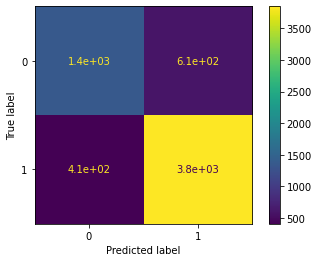

In [ ]:
start = time.time()
clf_MLP = MLPClassifier().fit(X_train, Y_train)
Y_pred_MLP = clf_MLP.predict(X_test)
end = time.time()
metrics.plot_confusion_matrix(clf_MLP, X_test, Y_test)
print(classification_report(Y_test, Y_pred_MLP))
print("Time Taken: "+str(end-start))
fpr_MLP, tpr_MLP, thresh_MLP = metrics.roc_curve(Y_test, Y_pred_MLP)
auc_MLP = metrics.roc_auc_score(Y_test, Y_pred_MLP)
print("ROC Score: "+str(auc_MLP))

#**Linear Discriminant Analysis**

              precision    recall  f1-score   support

           0       0.84      0.55      0.67      1974
           1       0.82      0.95      0.88      4255

    accuracy                           0.82      6229
   macro avg       0.83      0.75      0.77      6229
weighted avg       0.83      0.82      0.81      6229

Time Taken: 0.07082271575927734
ROC Score: 0.7520364027302049


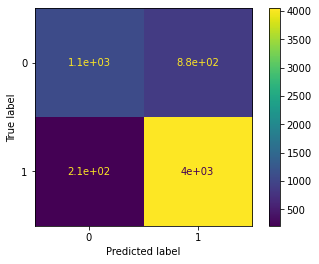

In [ ]:
start = time.time()
clf_LDA = LinearDiscriminantAnalysis().fit(X_train, Y_train)
Y_pred_LDA = clf_LDA.predict(X_test)
end = time.time()
metrics.plot_confusion_matrix(clf_LDA, X_test, Y_test)
print(classification_report(Y_test, Y_pred_LDA))
print("Time Taken: "+str(end-start))
fpr_LDA, tpr_LDA, thresh_LDA = metrics.roc_curve(Y_test, Y_pred_LDA)
auc_LDA = metrics.roc_auc_score(Y_test, Y_pred_LDA)
print("ROC Score: "+str(auc_LDA))

#**K-Neighbours Classifier**

              precision    recall  f1-score   support

           0       0.73      0.66      0.69      1974
           1       0.85      0.89      0.87      4255

    accuracy                           0.82      6229
   macro avg       0.79      0.77      0.78      6229
weighted avg       0.81      0.82      0.81      6229

Time Taken: 0.521125078201294
ROC Score: 0.7743152164983803


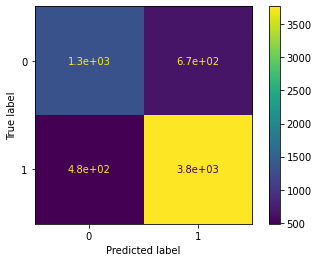

In [ ]:
start = time.time()
clf_KNC = KNeighborsClassifier().fit(X_train, Y_train)
Y_pred_KNC = clf_KNC.predict(X_test)
end = time.time()
metrics.plot_confusion_matrix(clf_KNC, X_test, Y_test)
print(classification_report(Y_test, Y_pred_KNC))
print("Time Taken: "+str(end-start))

fpr_KNC, tpr_KNC, thresh_KNC = metrics.roc_curve(Y_test, Y_pred_KNC)
auc_KNC = metrics.roc_auc_score(Y_test, Y_pred_KNC)
print("ROC Score: "+str(auc_KNC))

#**Deep Neural Classifier**





In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

dnc_classifier = Sequential()
dnc_classifier.add(Dense(100, input_dim=11, activation='relu'))
dnc_classifier.add(Dense(70, activation='relu'))
dnc_classifier.add(Dense(40, activation='relu'))
dnc_classifier.add(Dense(20, activation='relu'))
dnc_classifier.add(Dense(15, activation='relu'))
dnc_classifier.add(Dense(10, activation='relu'))
dnc_classifier.add(Dense(5, activation='relu'))
dnc_classifier.add(Dense(1, activation='sigmoid'))
dnc_classifier.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
start = time.time()
dnc_classifier.fit(X_train, Y_train, epochs=100, batch_size=64, validation_data = (X_test, Y_test))
end = time.time()
print("Time Taken: "+str(end-start))

Y_pred_NN = dnc_classifier.predict(X_test)
Y_pred_NN=np.round(Y_pred_NN)
print(classification_report(Y_pred_NN,Y_test))
print(confusion_matrix(Y_test,Y_pred_NN))

fpr_DNC, tpr_DNC, thresh_DNC = metrics.roc_curve(Y_test, Y_pred_NN)
auc_DNC = metrics.roc_auc_score(Y_test, Y_pred_NN)
print("ROC Score: "+str(auc_DNC))

Epoch 1/100
390/390 [==============================] - 2s 3ms/step - loss: 0.4890 - accuracy: 0.7682 - val_loss: 0.3872 - val_accuracy: 0.8327
Epoch 2/100
390/390 [==============================] - 1s 2ms/step - loss: 0.3699 - accuracy: 0.8383 - val_loss: 0.3840 - val_accuracy: 0.8318
Epoch 3/100
390/390 [==============================] - 1s 2ms/step - loss: 0.3690 - accuracy: 0.8374 - val_loss: 0.3782 - val_accuracy: 0.8372
Epoch 4/100
390/390 [==============================] - 1s 2ms/step - loss: 0.3667 - accuracy: 0.8418 - val_loss: 0.3784 - val_accuracy: 0.8342
Epoch 5/100
390/390 [==============================] - 1s 2ms/step - loss: 0.3705 - accuracy: 0.8348 - val_loss: 0.3773 - val_accuracy: 0.8358
Epoch 6/100
390/390 [==============================] - 1s 2ms/step - loss: 0.3731 - accuracy: 0.8376 - val_loss: 0.3800 - val_accuracy: 0.8348
Epoch 7/100
390/390 [==============================] - 1s 2ms/step - loss: 0.3686 - accuracy: 0.8383 - val_loss: 0.3892 - val_accuracy: 0.8326

# **ROC Curves**

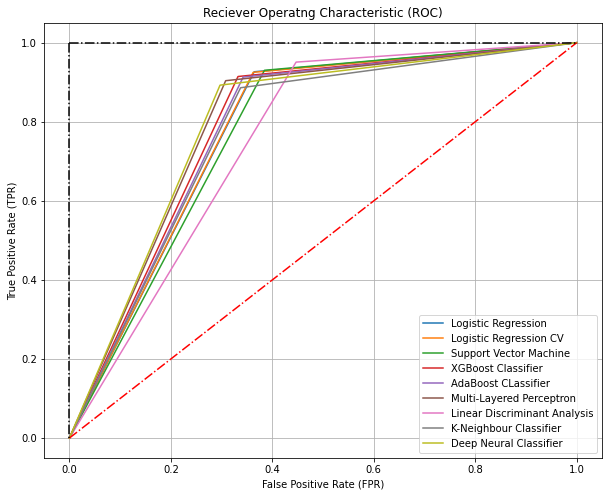

In [ ]:
from matplotlib import pyplot as plt_ROC
plt_ROC.figure(figsize=(10,8))
plt_ROC.plot(fpr_LR,tpr_LR, label='Logistic Regression')
plt_ROC.plot(fpr_LRCV,tpr_LRCV, label='Logistic Regression CV')
plt_ROC.plot(fpr_SVM,tpr_SVM, label='Support Vector Machine')
plt_ROC.plot(fpr_XGB,tpr_XGB, label='XGBoost Classifier')
plt_ROC.plot(fpr_ABC,tpr_ABC, label='AdaBoost CLassifier')
plt_ROC.plot(fpr_MLP,tpr_MLP, label='Multi-Layered Perceptron')
plt_ROC.plot(fpr_LDA,tpr_LDA, label='Linear Discriminant Analysis')
plt_ROC.plot(fpr_KNC,tpr_KNC, label='K-Neighbour Classifier')
plt_ROC.plot(fpr_DNC,tpr_DNC, label='Deep Neural Classifier')
plt_ROC.legend()
plt_ROC.plot([0, 1], [0, 1],'r-.')
plt_ROC.plot([0, 0], [1, 0], 'k-.'), plt_ROC.plot([1, 1], 'k-.')
plt_ROC.xlabel('False Positive Rate (FPR)')
plt_ROC.ylabel('True Positive Rate (TPR)')
plt_ROC.title('Reciever Operatng Characteristic (ROC)')
plt_ROC.grid()
plt_ROC.show()

# **Result on Test Data from Best Model (XGBoost Classifier)**

              precision    recall  f1-score   support

           0       0.78      0.67      0.72      2444
           1       0.86      0.91      0.88      5343

    accuracy                           0.84      7787
   macro avg       0.82      0.79      0.80      7787
weighted avg       0.83      0.84      0.83      7787

ROC Score: 0.7895282553032202


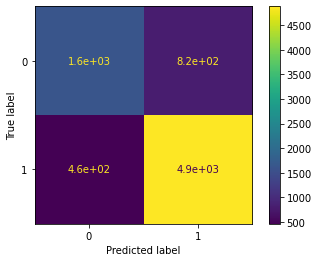

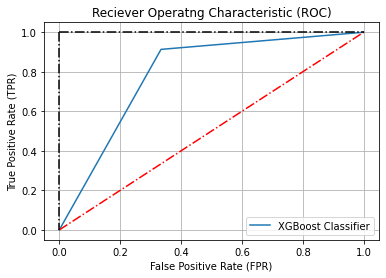

In [ ]:
from matplotlib import pyplot as plt_ROC
Y_pred_real_XGB = clf_XGB.predict(X_real_test)
metrics.plot_confusion_matrix(clf_XGB, X_real_test, Y_real_test)
print(classification_report(Y_real_test, Y_pred_real_XGB))
fpr_XGB_test, tpr_XGB_test, thresh_XGB_test = metrics.roc_curve(Y_real_test, Y_pred_real_XGB)
auc_XGB_test = metrics.roc_auc_score(Y_real_test, Y_pred_real_XGB)
print("ROC Score: "+str(auc_XGB_test))
plt_ROC.figure()
plt_ROC.plot(fpr_XGB_test,tpr_XGB_test, label='XGBoost Classifier')
plt_ROC.plot([0, 1], [0, 1],'r-.')
plt_ROC.plot([0, 0], [1, 0], 'k-.'), plt_ROC.plot([1, 1], 'k-.')
plt_ROC.legend()
plt_ROC.xlabel('False Positive Rate (FPR)')
plt_ROC.ylabel('True Positive Rate (TPR)')
plt_ROC.title('Reciever Operatng Characteristic (ROC)')
plt_ROC.grid()
plt_ROC.show()

Logistic Regression
[[1286  723]
 [ 319 3901]]
              precision    recall  f1-score   support

           0       0.80      0.64      0.71      2009
           1       0.84      0.92      0.88      4220

    accuracy                           0.83      6229
   macro avg       0.82      0.78      0.80      6229
weighted avg       0.83      0.83      0.83      6229

ROC Score: 0.7822635226787513
Time Taken: 0.18498969078063965



LRCV
[[1291  718]
 [ 327 3893]]
              precision    recall  f1-score   support

           0       0.80      0.64      0.71      2009
           1       0.84      0.92      0.88      4220

    accuracy                           0.83      6229
   macro avg       0.82      0.78      0.80      6229
weighted avg       0.83      0.83      0.83      6229

ROC Score: 0.7825600555792771
Time Taken: 2.8175649642944336



Random Forest
[[1319  690]
 [ 501 3719]]
              precision    recall  f1-score   support

           0       0.72      0.66      0.6

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


              precision    recall  f1-score   support

           0       0.78      0.59      0.67      2009
           1       0.83      0.92      0.87      4220

    accuracy                           0.81      6229
   macro avg       0.80      0.75      0.77      6229
weighted avg       0.81      0.81      0.81      6229

ROC Score: 0.7546623134284346
Time Taken: 0.05888795852661133





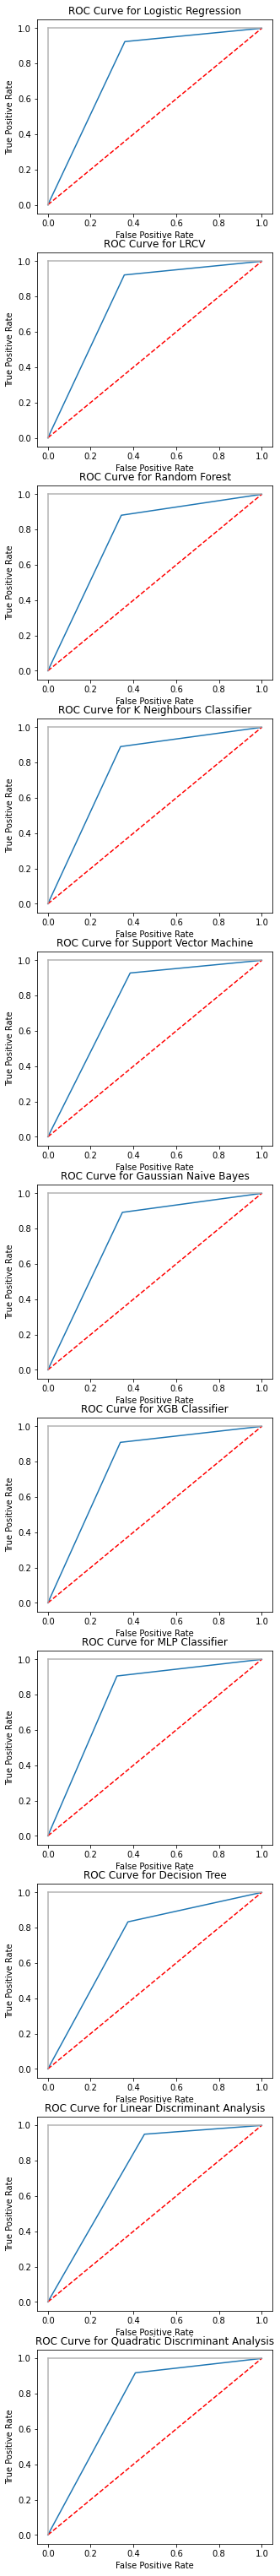

In [ ]:
models = [
          ('Logistic Regression', LogisticRegression()),
          ('LRCV', LogisticRegressionCV(cv=5, penalty='elasticnet', solver='saga', random_state=0, l1_ratios=[0.75], max_iter=5000)),
          ('Random Forest', RandomForestClassifier()),
          ('K Neighbours Classifier', KNeighborsClassifier()),
          ('Support Vector Machine', SVC(kernel='rbf', gamma=0.7, C=1)),
          ('Gaussian Naive Bayes', GaussianNB()),
          ('XGB Classifier', XGBClassifier()),
          ('MLP Classifier', MLPClassifier()),
          ('Decision Tree', DecisionTreeClassifier(criterion='entropy')),
          ('Linear Discriminant Analysis', LinearDiscriminantAnalysis()),
          ('Quadratic Discriminant Analysis', QuadraticDiscriminantAnalysis())
        ]

fig, ax = plt.subplots(11,1,figsize=(5,55))
i=0

for name, model in models:
    start = time.time()
    clf = model.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    end = time.time()

    fpr, tpr, thresh = metrics.roc_curve(Y_test, Y_pred)
    auc = metrics.roc_auc_score(Y_test, Y_pred)

    ax[i].plot(fpr,tpr,label=name)
    ax[i].plot([0, 1], [0, 1],'r--')
    ax[i].plot([0, 0], [1, 0], c='0.7'), ax[i].plot([1, 1], c='0.7')
    ax[i].set_title("ROC Curve for "+name)
    ax[i].set_xlabel("False Positive Rate")
    ax[i].set_ylabel("True Positive Rate")
    i += 1

    print(name)
    print(confusion_matrix(Y_test, Y_pred))
    print(classification_report(Y_test, Y_pred))
    print("ROC Score: "+str(auc))
    print("Time Taken: "+str(end-start))
    print("\n\n")

#Taking into account the Word Count

In [ ]:
df_test['polarity'] = df_test['Description'].map(lambda text: TextBlob(text).sentiment.polarity)

In [ ]:

browsers_test = df_test_clean['Browser_Used']
browsers_test = browsers_test.replace('InternetExplorer','Internet_Explorer')
browsers_test = browsers_test.replace('IE','Internet_Explorer')
browsers_test = browsers_test.replace('Chrome','Google_Chrome')
browsers_test = browsers_test.replace('Mozilla','Mozilla_Firefox')
browsers_test = browsers_test.replace('Firefox','Mozilla_Firefox')
browsers_test = browsers_test.replace('Internet Explorer','Internet_Explorer')
browsers_test = browsers_test.replace('Google Chrome','Google_Chrome')
browsers_test = browsers_test.replace('Mozilla Firefox','Mozilla_Firefox')

df_test_clean['Word_Count'] = df_test_clean['Description'].map(lambda text: len(text.split("|")));

cvec = CountVectorizer()

X = browsers_test
cvec = CountVectorizer(stop_words='english').fit(X)
browser_test = pd.DataFrame(cvec.transform(X).todense(),columns=cvec.get_feature_names())
browser_test = browser_test.set_index(pd.Index(X.index))

X = df_test_clean.Device_Used
cvec = CountVectorizer(stop_words='english').fit(X)
device_test = pd.DataFrame(cvec.transform(X).todense(), columns=cvec.get_feature_names())
device_test = device_test.set_index(pd.Index(X.index))

X = df_test['polarity']
polarity_test = pd.DataFrame(X)

X = df_test_clean['Word_Count']
word_count_test = pd.DataFrame(X)

X_test_new = pd.concat([browser_test, device_test, polarity_test], axis=1)
#print(X_test_new)

[0 1 1 ... 1 1 1]


(array([ 7980.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 21424.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

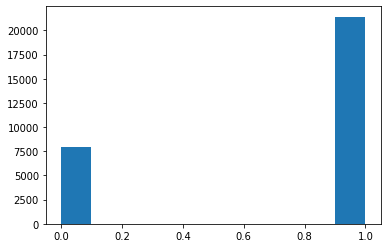

In [ ]:
from matplotlib import pyplot as plt_XGB
clf_test = XGBClassifier().fit(X_train, Y_train)
Y_pred_test = clf_test.predict(X_test_new)
print(Y_pred_test)
fig, ax = plt_XGB.subplots(1,1)
ax.hist(Y_pred_test)

[0 1 1 ... 0 1 1]


(array([11312.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 18092.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

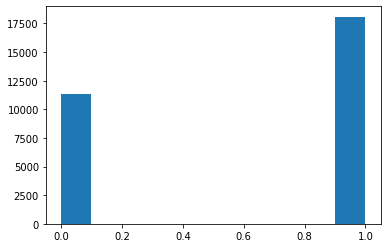

In [ ]:
from matplotlib import pyplot as plt_GNB
clf_test = GaussianNB().fit(X_train, Y_train)
Y_pred_test = clf_test.predict(X_test_new)
print(Y_pred_test)
fig, ax = plt_GNB.subplots(1,1)
ax.hist(Y_pred_test)

[0 1 1 ... 1 1 1]


(array([ 7323.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 22081.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

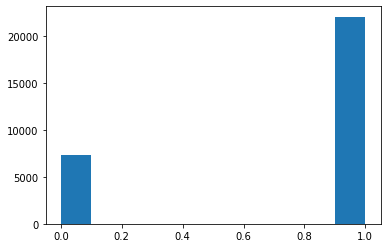

In [ ]:
from matplotlib import pyplot as plt_SVC
clf_test = SVC(kernel='rbf', gamma=0.7, C=1).fit(X_train, Y_train)
Y_pred_test = clf_test.predict(X_test_new)
print(Y_pred_test)
fig, ax = plt_SVC.subplots(1,1)
ax.hist(Y_pred_test)

[0 1 1 ... 1 1 1]


(array([ 8520.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 20884.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

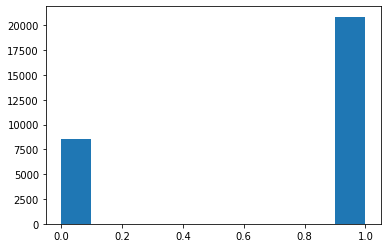

In [ ]:
from matplotlib import pyplot as plt_KNC
clf_test = KNeighborsClassifier().fit(X_train, Y_train)
Y_pred_test = clf_test.predict(X_test_new)
print(Y_pred_test)
fig, ax = plt_KNC.subplots(1,1)
ax.hist(Y_pred_test)

[0 1 0 ... 1 1 1]


(array([ 8613.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 20791.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

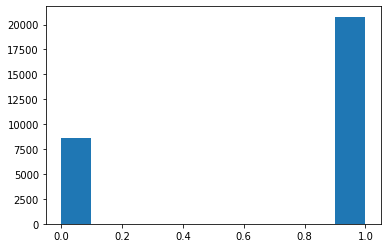

In [ ]:
from matplotlib import pyplot as plt_RFC
clf_test = RandomForestClassifier().fit(X_train, Y_train)
Y_pred_test = clf_test.predict(X_test_new)
print(Y_pred_test)
fig, ax = plt_RFC.subplots(1,1)
ax.hist(Y_pred_test)

[0 1 1 ... 1 1 1]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


(array([ 8149.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 21255.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

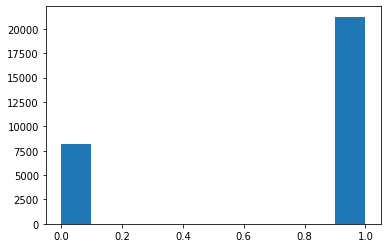

In [ ]:
from matplotlib import pyplot as plt_LR
clf_test = LogisticRegression().fit(X_train, Y_train)
Y_pred_test = clf_test.predict(X_test_new)
print(Y_pred_test)
fig, ax = plt_LR.subplots(1,1)
ax.hist(Y_pred_test)

[0 1 1 ... 1 1 1]


(array([ 8286.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 21118.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

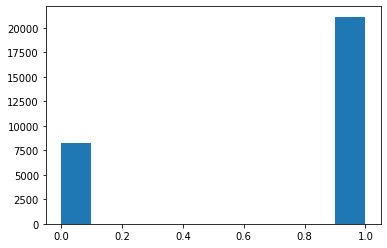

In [ ]:
from matplotlib import pyplot as plt_MLP
clf_test = MLPClassifier().fit(X_train, Y_train)
Y_pred_test = clf_test.predict(X_test_new)
print(Y_pred_test)
fig, ax = plt_MLP.subplots(1,1)
ax.hist(Y_pred_test)

[0 1 0 ... 1 1 1]


(array([ 9424.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 19980.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

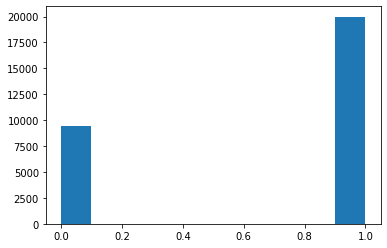

In [ ]:
from matplotlib import pyplot as plt_DT
clf_test = DecisionTreeClassifier().fit(X_train, Y_train)
Y_pred_test = clf_test.predict(X_test_new)
print(Y_pred_test)
fig, ax = plt_DT.subplots(1,1)
ax.hist(Y_pred_test)

[0 1 1 ... 1 1 1]


(array([ 7879.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 21525.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

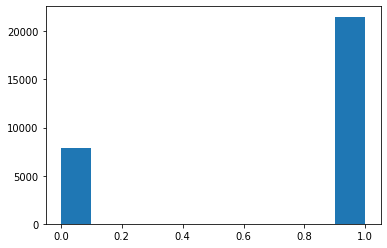

In [ ]:
from matplotlib import pyplot as plt_LDA
clf_test = LinearDiscriminantAnalysis().fit(X_train, Y_train)
Y_pred_test = clf_test.predict(X_test_new)
print(Y_pred_test)
fig, ax = plt_LDA.subplots(1,1)
ax.hist(Y_pred_test)

[0 1 1 ... 0 1 1]


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


(array([11145.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 18259.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

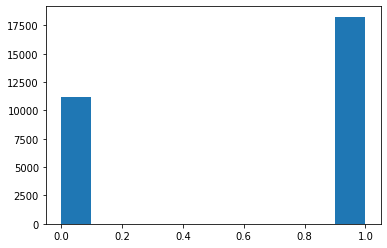

In [ ]:
from matplotlib import pyplot as plt_QDA
clf_test = QuadraticDiscriiminantAnalysis().fit(X_train, Y_train)
Y_pred_test = clf_test.predict(X_test_new)
print(Y_pred_test)
fig, ax = plt_QDA.subplots(1,1)
ax.hist(Y_pred_test)